<a href="https://colab.research.google.com/github/muwongelawrence-tech/colab_projects/blob/main/ImageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras import layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


# print("hellow world")

In [ ]:
from keras.datasets import cifar10
(x_train ,y_train) ,(x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))



<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print('x_train shape', x_train.shape)
print('y_train shape', y_train.shape)
print('x_test shape', x_test.shape)
print('y_test shape', y_test.shape)

x_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)
x_test shape (10000, 32, 32, 3)
y_test shape (10000, 1)


In [ ]:
# Take a look at the first image as an array
index = 10
x_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

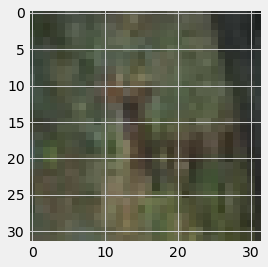

In [ ]:
#show image as a picture 
img = plt.imshow(x_train[index]) 

In [ ]:
# Get the image label
print('The image label is :', y_train[index])

The image label is : [4]


In [ ]:
# Get the image classification
classification = ['airplane', 'autombile','bird','cat','deer','dog','frog','horse','ship','truck']
#print the image class

print('The image class is :', classification[y_train[index][0]])

The image class is : deer


In [ ]:
# Convert the labels into a set of 10 numbers to input the nueral network
y_train_one_hot = to_categorical(y_train)
# y_train_one_hot
y_test_one_hot = to_categorical(y_test)
# y_test_one_hot

In [ ]:
#print the labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
#print the new label of the image/picture above
print('The one hot label is:', y_train_one_hot[index])

The one hot label is: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
#Normalize the pixels to be values between 0 and 1
x_train = x_train /255
x_test = x_test / 255

In [ ]:
# Testing normalization of pixels
x_train[index]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [ ]:
#create the models architecture
model = Sequential()

#Add the first layer
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))

#Add a pooling Layer
model.add(MaxPooling2D(pool_size = (2,2)))
#Add another convolution layer
model.add(Conv2D(32, (5,5), activation='relu'))
#Add another pooling Layer
model.add(MaxPooling2D(pool_size = (2,2)))
#Add a flattening layer
model.add(Flatten())

#Add a layer with 1000 nuerons
model.add(Dense(1000, activation = 'relu'))

# Add a drop out layer
model.add(Dropout(0.5))

#Add a layer with 500 nuerons
model.add(Dense(500, activation = 'relu'))

# Add a drop out layer
model.add(Dropout(0.5))

#Add a layer with 250 nuerons
model.add(Dense(250, activation = 'relu'))

#Add a layer with 10 nuerons
model.add(Dense(10, activation = 'softmax'))

In [ ]:
#Compile the model
# model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) ,optimizer = 'adam', metrics = ['accuracy'])
model.compile(optimizer='adam',loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
# Train the model
hist = model.fit(x_train, y_train,epochs=10, batch_size = 256, validation_split = 0.2)
# hist = model.fit(x_train, y_train_one_hot , validation_split = 0.2 , epochs = 10, batch_size = 256 )
# hist = model.fit( x= x_train, y= y_train_one_hot,validation_split = 0.2, batch_size=256, epochs=10 )

Epoch 1/10
157/157 [==============================] - 65s 414ms/step - loss: 0.4886 - accuracy: 0.1004 - val_loss: 0.6765 - val_accuracy: 0.1009
Epoch 2/10
157/157 [==============================] - 69s 441ms/step - loss: 0.4680 - accuracy: 0.1000 - val_loss: 0.7288 - val_accuracy: 0.1003
Epoch 3/10
157/157 [==============================] - 69s 437ms/step - loss: 0.4370 - accuracy: 0.1007 - val_loss: 0.7101 - val_accuracy: 0.1013
Epoch 4/10
157/157 [==============================] - 57s 363ms/step - loss: 0.4238 - accuracy: 0.1007 - val_loss: 0.7138 - val_accuracy: 0.0927
Epoch 5/10
157/157 [==============================] - 59s 377ms/step - loss: 0.3961 - accuracy: 0.1009 - val_loss: 0.7248 - val_accuracy: 0.0988
Epoch 6/10
157/157 [==============================] - 57s 364ms/step - loss: 0.3737 - accuracy: 0.1008 - val_loss: 0.7567 - val_accuracy: 0.0889
Epoch 7/10
157/157 [==============================] - 58s 372ms/step - loss: 0.3559 - accuracy: 0.1000 - val_loss: 0.7549 - val_ac

In [ ]:
model.evaluate(x_test, y_test)[1]

313/313 [==============================] - 5s 16ms/step - loss: 1.1492 - accuracy: 0.0994


0.09939999878406525

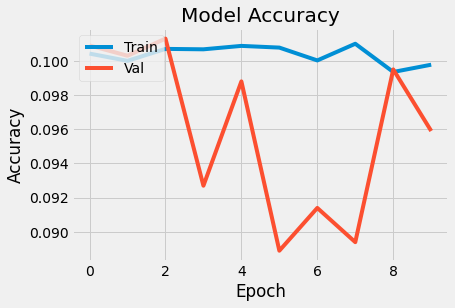

In [ ]:
#visualise the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

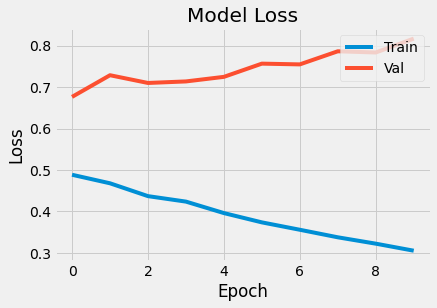

In [ ]:
#Visaul the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

In [ ]:
# test the model with an example
from google.colab import files
uploaded = files.upload()

Saving ml2.jpg to ml2.jpg


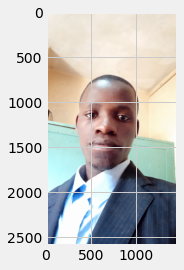

In [ ]:
#show the image
new_image = plt.imread('ml2.jpg')
img = plt.imshow(new_image)

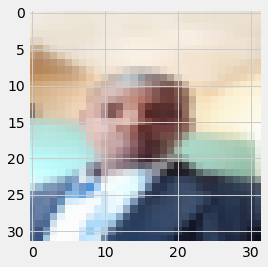

In [ ]:
#Resize the image
from skimage.transform import resize
resized_image = resize(new_image , (32, 32, 3))
img = plt.imshow(resized_image)

In [ ]:
#Get the models predictions 
predictions = model.predict(np.array([resized_image]))
#Show the predictions
predictions

array([[5.6921945e-06, 1.2807743e-07, 4.0840905e-02, 9.5381486e-01,
        3.0929632e-06, 4.9962858e-03, 3.2247449e-04, 1.9786357e-06,
        1.3894178e-05, 8.1668401e-07]], dtype=float32)

In [ ]:
#sort the predictions from least to greatest
list_index = [ 0,1,2,3,4,5,6,7,8,9]
x =  predictions
for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

#show the sorted labels in order
print(list_index)    

[3, 2, 5, 6, 8, 0, 4, 7, 9, 1]


In [ ]:
#print the first 5 predictions
for i in range(5):
  print(classification[list_index[i]],':',round(predictions[0][list_index][i] * 100,2), '%')

cat : 95.38 %
bird : 4.08 %
dog : 0.5 %
frog : 0.03 %
ship : 0.0 %
